In [28]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from PIL import Image
import cv2

[[[125 137 117]
  [122 134 113]
  [118 130 108]
  ...
  [158 144 118]
  [159 145 119]
  [174 160 134]]

 [[121 133 113]
  [118 130 110]
  [116 127 106]
  ...
  [159 145 119]
  [160 146 120]
  [173 159 133]]

 [[113 125 105]
  [111 123 103]
  [109 121 100]
  ...
  [159 145 120]
  [160 146 120]
  [172 158 132]]

 ...

 [[204 203 201]
  [200 199 197]
  [194 192 190]
  ...
  [ 97 118 150]
  [106 128 160]
  [ 98 120 143]]

 [[202 200 198]
  [198 196 194]
  [190 189 187]
  ...
  [ 89 109 141]
  [106 128 159]
  [101 122 144]]

 [[196 190 190]
  [193 187 187]
  [185 180 180]
  ...
  [ 92 106 138]
  [111 127 158]
  [100 118 138]]]
(256, 256, 3)


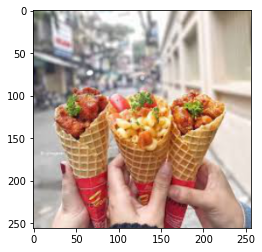

In [29]:
img = plt.imread('image.jpg')
img = cv2.resize(img,(256,256))
print(img)
plt.imshow(img)
#img = np.reshape(img,(img.shape[0],img.shape[1],1))
print(img.shape)

In [30]:
kernel = np.random.rand(3,3)
print(kernel)
test = np.zeros((3,3))

[[0.08758349 0.04177614 0.85045226]
 [0.80963017 0.42659691 0.47309075]
 [0.2065764  0.8483938  0.66009969]]


In [31]:
def conv2(img,kernel):
    damage = img.shape[-1]
    ker_size = kernel.shape[-1]
    img_x, img_y = img.shape[0], img.shape[1]
    res = np.zeros((img.shape[0] - ker_size + 1,img.shape[1] - ker_size + 1,img.shape[2]))
    ker_padding = int(ker_size / 2)
    for color in range(damage):
        for x in range(ker_padding,img_x - ker_padding):
            for y in range(ker_padding,img_y - ker_padding):
                #print(img[x-ker_padding:x+ker_padding + 1,y-ker_padding:y+ker_padding + 1,color].shape)
                res[x - ker_padding, y - ker_padding, color] = np.sum(kernel*img[x-ker_padding:x+ker_padding + 1,y-ker_padding:y+ker_padding + 1,color])
    return res

In [32]:
def maxpooling2d(img,kernel):
    ker_size = kernel.shape[0]
    ker_padding = int(ker_size / 2)
    img_x, img_y = img.shape[0], img.shape[1]
    res = np.zeros((img.shape[0] - ker_size + 1,img.shape[1] - ker_size + 1,img.shape[2]))
    for color in range(img.shape[2]):
        for x in range(ker_padding,img_x - ker_padding):
            for y in range(ker_padding,img_y - ker_padding):
                res[x - ker_padding, y - ker_padding, color] = max(0,np.max(img[x-ker_padding:x+ker_padding + 1,y-ker_padding:y+ker_padding + 1,color]))
    
    return res

In [36]:
def batchnorm(img):
    return img / np.max(img)

(104, 104, 3)
[[[0.83549651 0.8250087  0.83882752]
  [0.83671922 0.82511606 0.8377143 ]
  [0.83784308 0.8253219  0.83652504]
  ...
  [0.96712527 0.92541445 0.88648058]
  [0.96831587 0.9267008  0.88788193]
  [0.96962061 0.92807297 0.88949449]]

 [[0.8371736  0.82369206 0.83499553]
  [0.83868359 0.82404331 0.83405629]
  [0.84008277 0.82447352 0.83307099]
  ...
  [0.96777636 0.92584092 0.88681069]
  [0.96896581 0.92711568 0.88820758]
  [0.97026823 0.92847527 0.88981814]]

 [[0.83912067 0.82230723 0.83100802]
  [0.84092917 0.82290892 0.83029722]
  [0.84261896 0.8235701  0.82956945]
  ...
  [0.96829245 0.926153   0.88705502]
  [0.96947387 0.92740828 0.88843417]
  [0.97076901 0.92874948 0.89003177]]

 ...

 [[0.85492821 0.6863099  0.59188851]
  [0.86312144 0.69572203 0.60894768]
  [0.87161563 0.70589975 0.62610412]
  ...
  [0.81351252 0.59337472 0.41157936]
  [0.81370633 0.59834929 0.41892912]
  [0.81413268 0.60431323 0.428872  ]]

 [[0.85719924 0.686143   0.59188569]
  [0.86554667 0.6959145

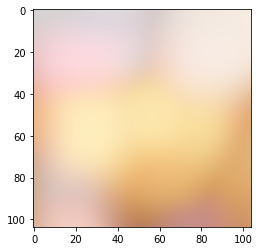

In [55]:
img_o = conv2(img_o,kernel)
img_o = conv2(img_o,np.random.rand(7,7))
img_o = batchnorm(img_o)
img_o = conv2(img_o,np.random.rand(7,7))
img_o = batchnorm(img_o)
img_o = maxpooling2d(img_o,np.random.rand(3,3))
print(img_o.shape)
print(img_o)
img_o = img_o / np.max(img_o)
plt.imshow(img_o)

In [50]:
tutor = np.max(img_o)
tutor

1.0

In [56]:
import tensorflow as tf
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.models import Sequential

In [57]:
model = Sequential()
model.add(UpSampling2D((256,256),input_shape = img_o.shape))

In [58]:
model_inputs = np.array([img_o])
outputs_upsampled = model.predict(model_inputs)


ResourceExhaustedError:  OOM when allocating tensor with shape[1,26624,26624,3] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential/up_sampling2d/resize/ResizeNearestNeighbor (defined at <ipython-input-58-49b081d30fc2>:2) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_predict_function_88]

Function call stack:
predict_function


In [ ]:
plt.imshow(outputs)